### TITLE      : CO2 Emmission Using Multi_linear Regression
### AUTHOR : Ottah Daniel Chukwuemeka
### DATE       :9th October 2023

#### ABOUT 
This is a multi linear regression model that predicts CO2 emission for new light-duty vehicles for retail sale in canada.Data  http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

## 5 MACHINE LEARNING WORKFLOW
## **ASK
## **PREPARE
## **SELECTING ALGORITHM
## **MODEL TRAINING
## **MODEL TESTING


# ASK : 
To predict CO2 Emmission of new light-duty vehicles for retail sale in canada 

# PREPARE : 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [26]:
# Reading dataset on pandas
df = pd.read_csv(r"C:\Users\daniel\Desktop\Files\Skills\Python for Data Science\DataScienceCourse\IBM_DS\modelling_data\FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [45]:
# Checking for null values
df.info

<bound method DataFrame.info of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION

In [27]:
pd.set_option('display.max.rows',100)
pd.set_option('display.max.rows',20)

In [28]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

###### MODELYEAR e.g. 2014
###### MAKE e.g. Acura
###### MODEL e.g. ILX
###### VEHICLE CLASS e.g. SUV
###### ENGINE SIZE e.g. 4.7
###### CYLINDERS e.g 6
###### TRANSMISSION e.g. A6
###### FUELTYPE e.g. z
###### FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
###### FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
###### FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
###### CO2 EMISSIONS (g/km) e.g. 182   --> low --> 0

In [29]:
df.shape

(1067, 13)

In [47]:
# checking for null rows
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

#### selecting columns for modelling

In [30]:
mdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Ploting each of the features above

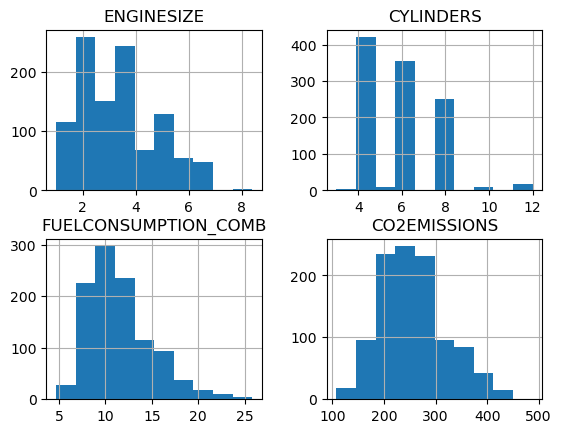

In [31]:
mdf.hist()
plt.show()

#### Now, let's plot each of these features against the Emission, to see how linear their relationship is:


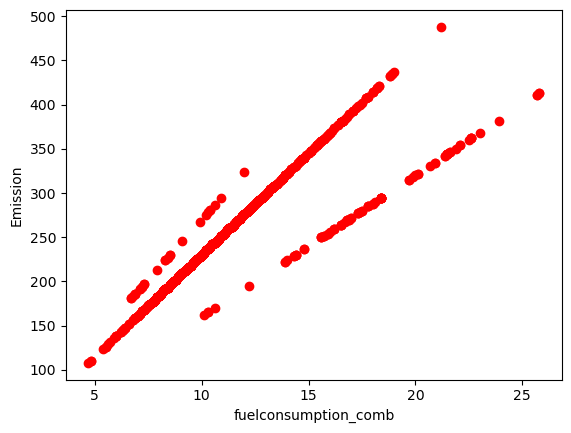

In [32]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB".lower())
plt.ylabel("Emission")
plt.show()


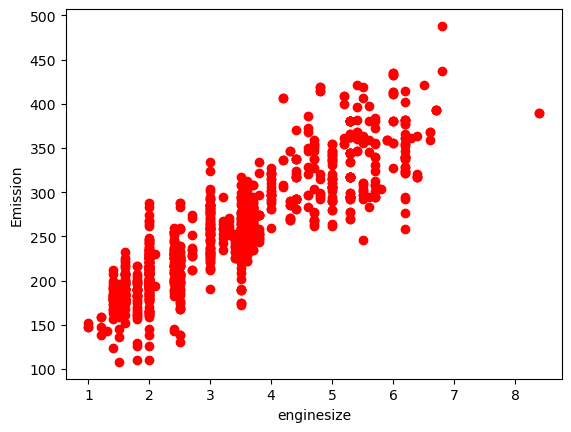

In [33]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='red')
plt.xlabel("ENGINESIZE".lower())
plt.ylabel("Emission")
plt.show()


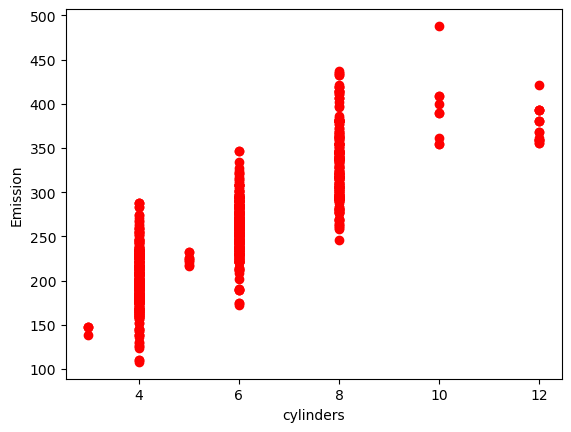

In [34]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='red')
plt.xlabel("CYLINDERS".lower())
plt.ylabel("Emission")
plt.show()


### Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [35]:
msk = np.random.rand(len(mdf)) < 0.8
train = mdf[msk]
test = mdf[~msk]


#### Train data distribution


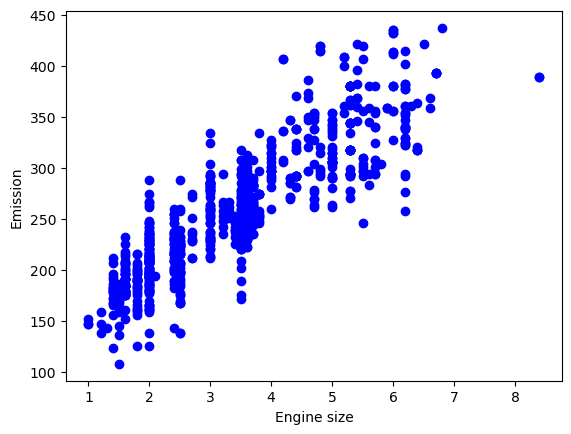

In [38]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

# ALGORITHM SELECTION : Multi-linear regression

###  Multiple Regression Model
Using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars

# MODEL TRAINING :

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:',regr.intercept_)

Coefficients: [[10.1366382   8.08387518  9.69308581]]
Intercept: [63.50925246]


 ##### Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

# MODEL TESTING

### Prediction

In [48]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 595.73
Variance score: 0.84


C:\Users\daniel\ANACONDA_3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
